<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/Multi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MasterStats

/content/drive/MyDrive/MasterStats


**Multiple Regression**
<br>
Simialr to ANOVA where it can be a non significant main effect but a sigificant interaction
```
y = Beta0 + Beta1 s + Beta2 h + Beta3(s x h) + epsilon
```
to implement an interaction term between multiple regressors you just simply multiply them.
<br>
**Precise Interpretation of Beta in Regression**
<br>

*Interpretation:* Beta reflects the effect of a chnage in 'h' on 'y' when all other variables are held constant

**Standardized Regression Coefficients**
<br>
The beta coefficients you get from the regression model , the raw output, those are unstandardized beta regressions.
<br>
The beta1 coefficients is interpreted as an 1 unit increase / change
<br>
unstandarized beta coefficients change depending on the scale of the Independent Variable
<br>
unstandarized beta coefficients can be difficult to compare across variables
<br>
These difficulties motivate a standardized of beta coefficients
<br>
standardized means that the data will have the same beta coefficients regardless of the original units of the data
<br>
Unstandardized beta coefficients reflect the scales of the data (IV and DV). This can faciliate interpretation but can also stymie comparisons across variables or models
<br>
Standardized beta coefficients are in standard deviation units, unrelated to the scales of the data.
<br>
Both are correct and neither is beteer; sometimes one is more natural or easier to interpret than the other
<br>
Standardization has no effect on the statistics.
<br>
**How to standardized regressors**
<br>

*Method 1*: z-normalization dependent variable and independent variables before the regression. All betas will be in the units of the data, which are already standard deviation units
<br>
*Method 2*: Scale the unstandardized beta by the standard deviations of the IV and the corresponding DV
```
b k = betak = std x k / std y
```
Interpretation: Beta2 reflects the effect of a one standard deviation change in h on standard deviation changes in y, *when all other variables are held constant*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [3]:
## example: effect of sleep and study hpurs on exam scores

exam_scores = []
for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(6,10,30)

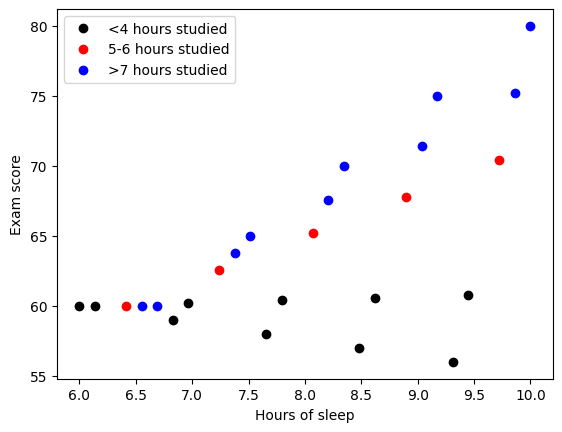

In [4]:
## plot the data

### stratify by hours studied

# fewer than 4 hours studied
plotidx = hours_studied<4.1
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k')

# 5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9, hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

# more than 6 hours
plotidx = hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied','5-6 hours studied','>7 hours studied'))
plt.show()

In [6]:
import statsmodels.api as sm

In [9]:
##multiple regression

#build the design matrix
desmat = np.vstack((np.ones((30)), ave_sleep_hrs, hours_studied*hours_studied)).T

multireg = sm.OLS(endog = exam_scores, exog= desmat).fit()
print(multireg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     37.60
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.57e-08
Time:                        00:16:21   Log-Likelihood:                -75.140
No. Observations:                  30   AIC:                             156.3
Df Residuals:                      27   BIC:                             160.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6490      3.862     10.266      0.0